# Models preparation and dependant/independant variables analysis
1. Compare correlations from the different services: electricity, natural gas and water consumption
2. Calculate correlations between these three services
3. Define machine learning algorithms and their attributes/parameters
4. Define key performance indicators that evaluate the performance of the two machine learning algorithms defined in point 3

## 1. Compare variables that have the most impact on the three service consumptions

##### Import libraries

In [2]:
# Import libraries for plotting, reading and wrangling data
library(tidyverse)
library(scales)
library(here)

##### Read CSV files

In [3]:
ElecCorrDF          <- read_csv(here::here("Data/Gold/Correlations", "gold_correlations_consumption_electricity.csv"),   show_col_types = FALSE) %>% mutate(consumption_type = "Electricity")
NaturalGasCorrDF    <- read_csv(here::here("Data/Gold/Correlations", "gold_correlations_consumption_natural_gas.csv"),   show_col_types = FALSE) %>% mutate(consumption_type = "Natural Gas")
WaterCorrDF         <- read_csv(here::here("Data/Gold/Correlations", "gold_correlations_consumption_water.csv"),         show_col_types = FALSE) %>% mutate(consumption_type = "Water")

##### Combine all three services

In [4]:
GlobalCorrDF <- ElecCorrDF %>% 
    union(NaturalGasCorrDF) %>% 
    union(WaterCorrDF) %>% 
    arrange(variable_two)

head(GlobalCorrDF, 30)

variable_one,variable_two,hourly,daily,monthly,consumption_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Consumption,Average Dew Point,-0.117,-0.328,-0.649,Electricity
Consumption,Average Dew Point,-0.354,-0.762,-0.855,Natural Gas
Consumption,Average Dew Point,0.019,0.054,0.093,Water
Consumption,Average Humidex,-0.019,0.016,-0.338,Electricity
Consumption,Average Humidex,-0.029,-0.091,-0.363,Natural Gas
Consumption,Average Humidex,-0.015,0.093,0.307,Water
Consumption,Average Relative Humidity (%),0.117,0.309,0.626,Electricity
Consumption,Average Relative Humidity (%),0.081,0.230,0.535,Natural Gas
Consumption,Average Relative Humidity (%),0.029,0.135,0.283,Water


##### Combine and modify dataframes

In [5]:
#=========================================
# ELECTRICITY
#=========================================
ConsElecMonthDF <- read_csv(here::here("Data/Gold/Electricity", "gold_monthly_electricity.csv"),    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Electricity"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

#=========================================
# NATURAL GAS
#=========================================
ConsNGMonthDF <- read_csv(here::here("Data/Gold/NaturalGas", "gold_monthly_natural_gas.csv"),    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Natural Gas"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

#=========================================
# WEATHER
#=========================================
WeatherMonthly   <- read_csv(here::here("Data/Gold/Weather", "gold_monthly_weather.csv"), show_col_types = FALSE) %>%
                    mutate(year_month = factor(paste(year, month, sep = "-")))

#=========================================
# JOIN WEATHER WITH CONSUMPTION DATAFRAMES
#=========================================
# Electricity & Weather
ElecWeatherMonthDF <- WeatherMonthly %>%
    left_join(ConsElecMonthDF,   by = c("year", "month"), suffix = c("", "_energy")) %>%
    select(year, month, year_month, avg_temp, avg_dewpt_temp, avg_rel_hum_pct, avg_wind_dir, avg_wind_spd, avg_visib, avg_stn_press, avg_hmdx, avg_wind_chill, `Consumption Type`, consumption)
# Natural Gas & Weather
NGWeatherMonthDF <- WeatherMonthly %>%
    left_join(ConsNGMonthDF,   by = c("year", "month"), suffix = c("", "_energy")) %>%
    select(year, month, year_month, avg_temp, avg_dewpt_temp, avg_rel_hum_pct, avg_wind_dir, avg_wind_spd, avg_visib, avg_stn_press, avg_hmdx, avg_wind_chill, `Consumption Type`, consumption)

##### Vizualisation of consumption vs. Average Dew Point

In [6]:
# Define plot theme
base_theme_month        <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

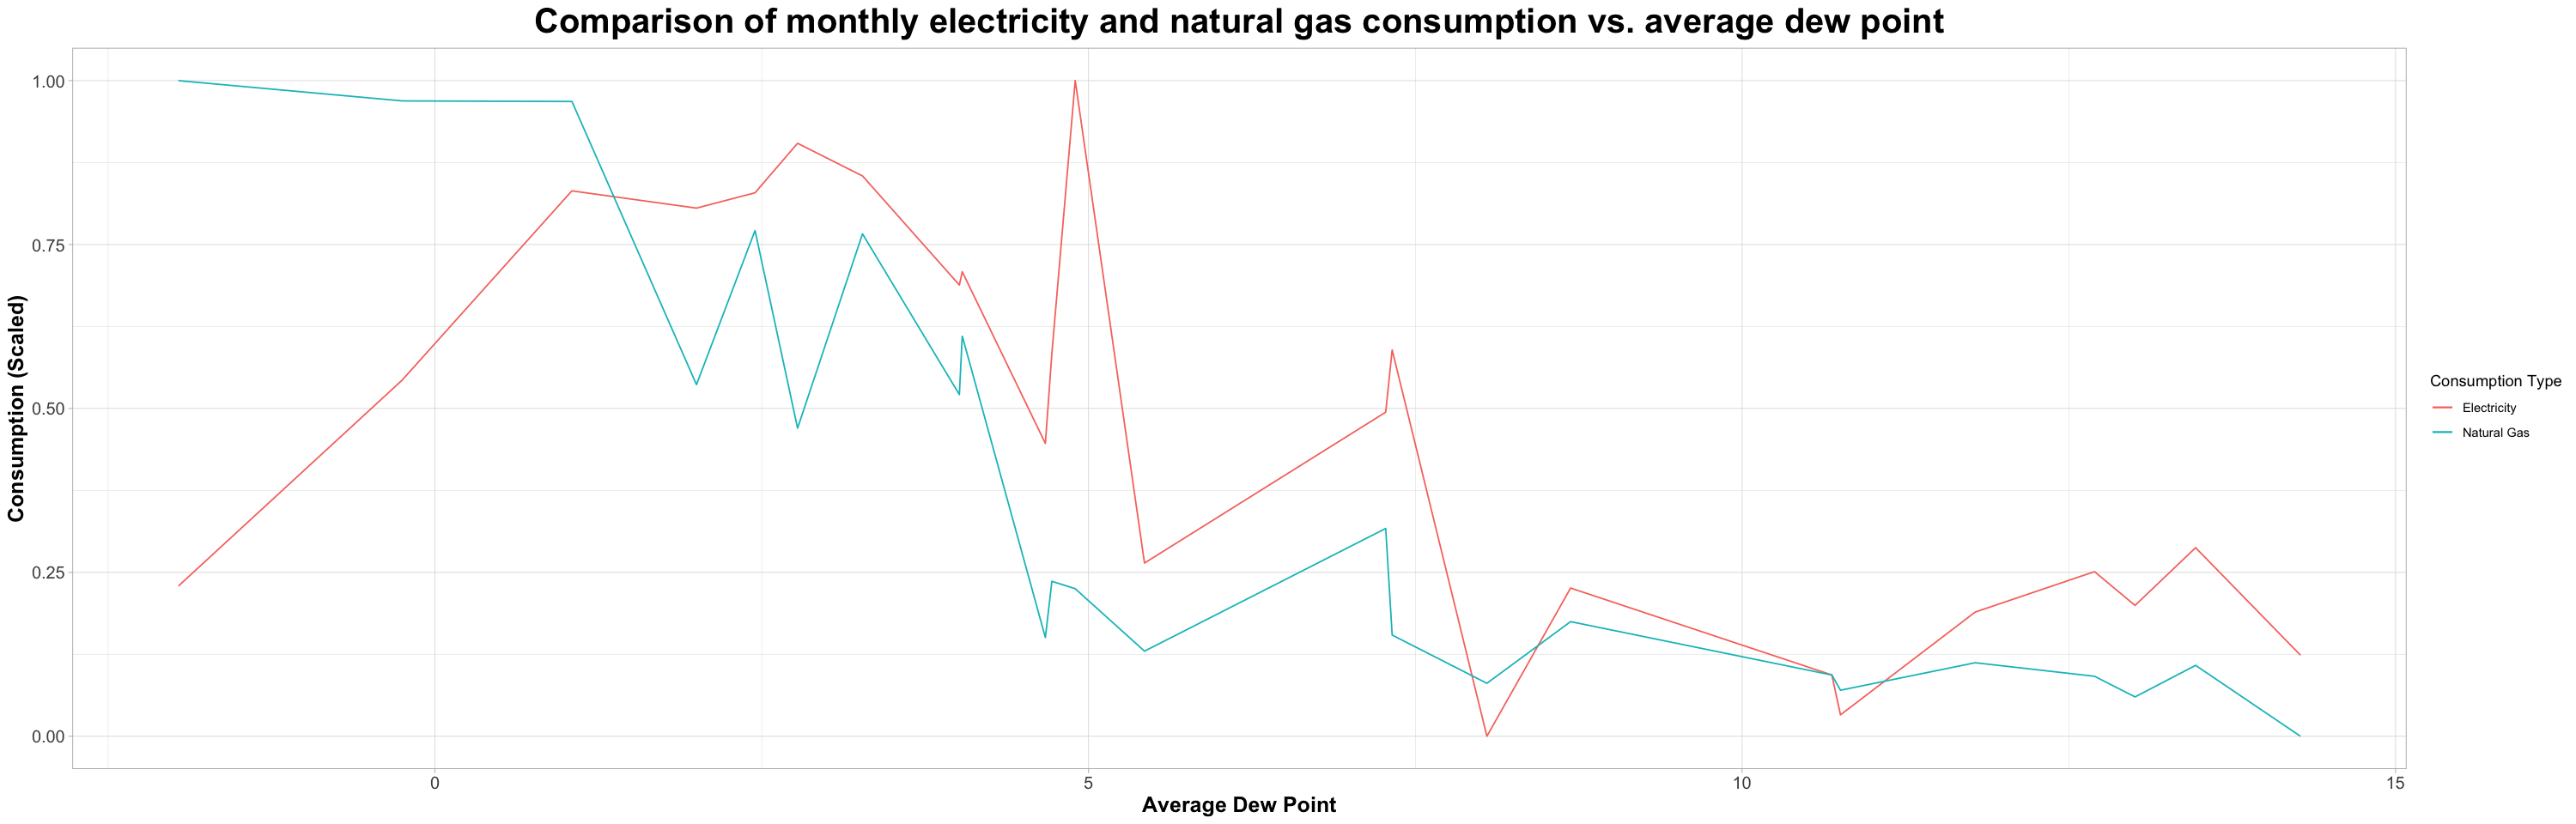

In [7]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ElecWeatherMonthDF, aes(x = avg_dewpt_temp, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=NGWeatherMonthDF) +
    labs(x = "Average Dew Point", y = "Consumption (Scaled)") +
    ggtitle("Comparison of monthly electricity and natural gas consumption vs. average dew point") +
    base_theme_month

##### Vizualisation of consumption vs. Average Relative Humidity (%)

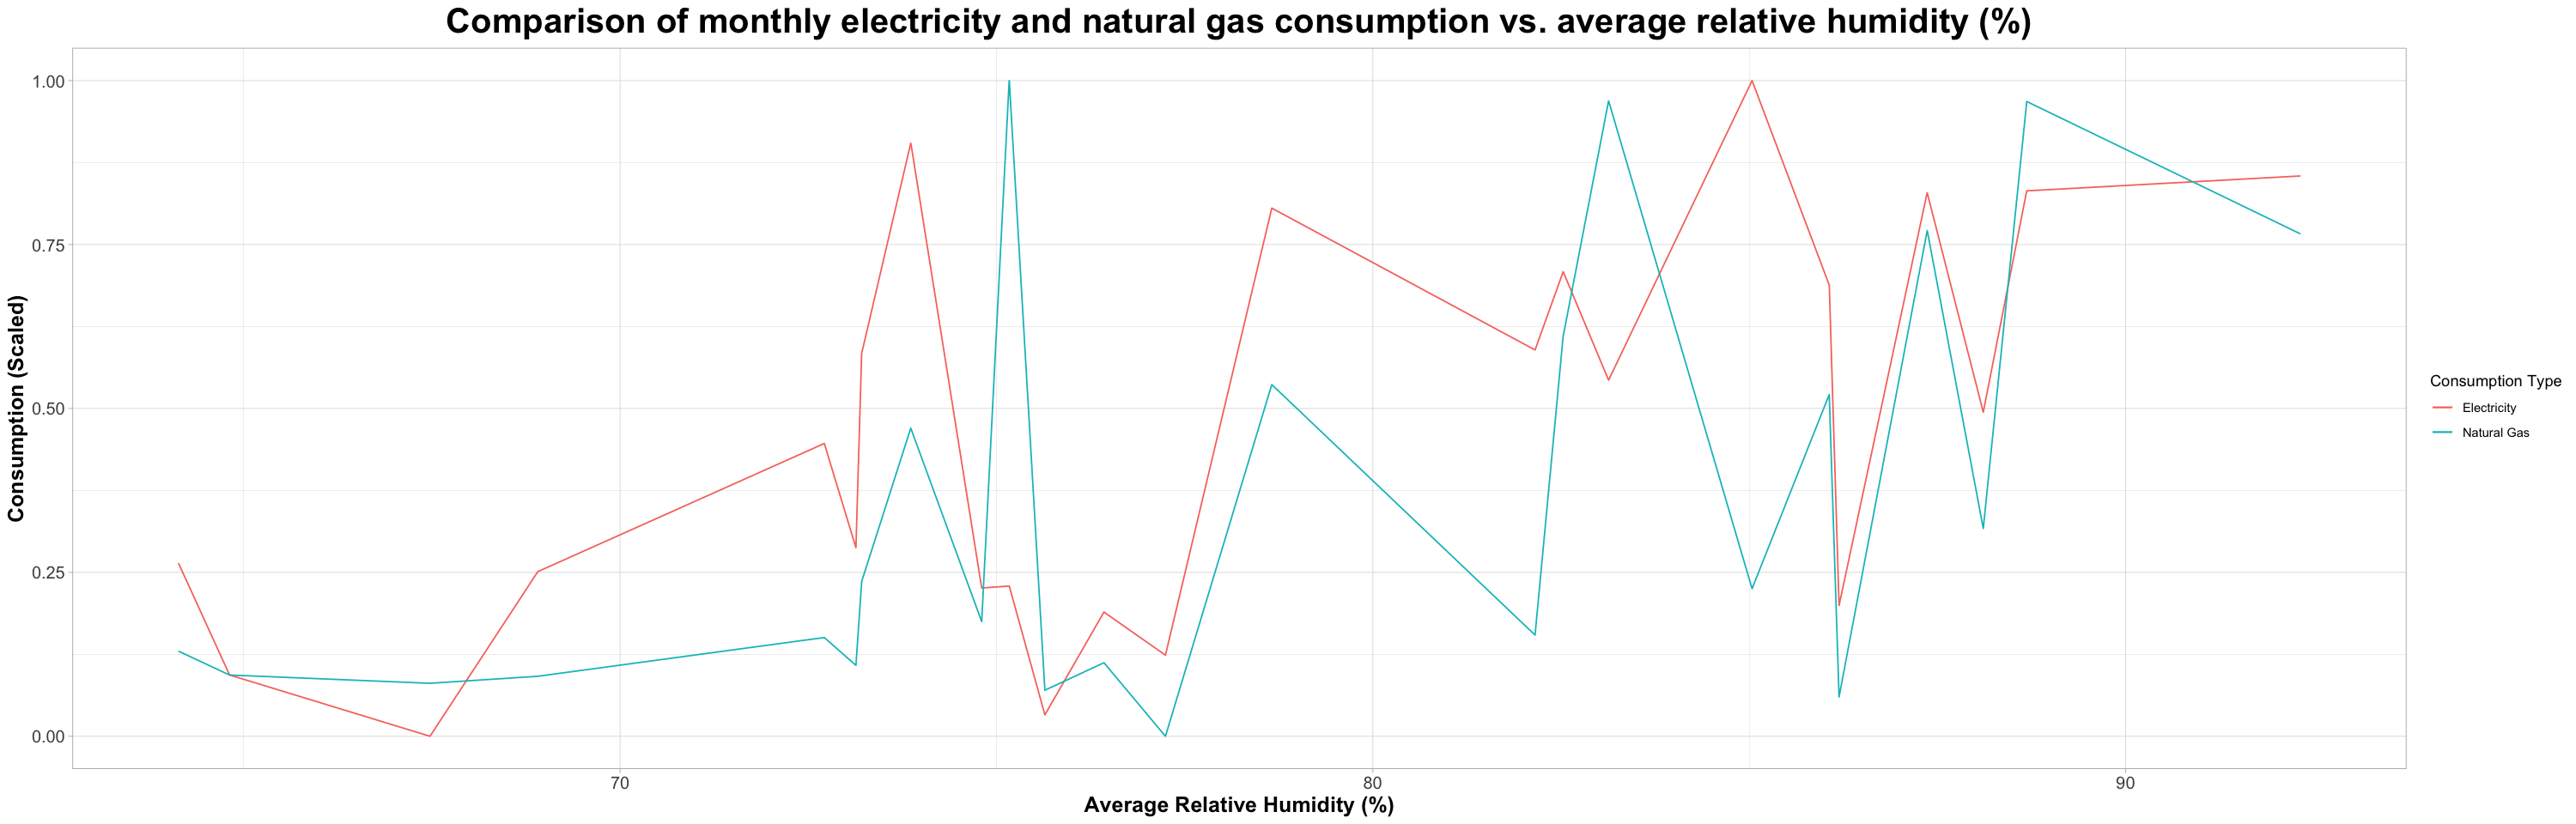

In [8]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ElecWeatherMonthDF, aes(x = avg_rel_hum_pct, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=NGWeatherMonthDF) +
    labs(x = "Average Relative Humidity (%)", y = "Consumption (Scaled)") +
    ggtitle("Comparison of monthly electricity and natural gas consumption vs. average relative humidity (%)") +
    base_theme_month

##### Vizualisation of consumption vs. Average Temperature (Celsius)

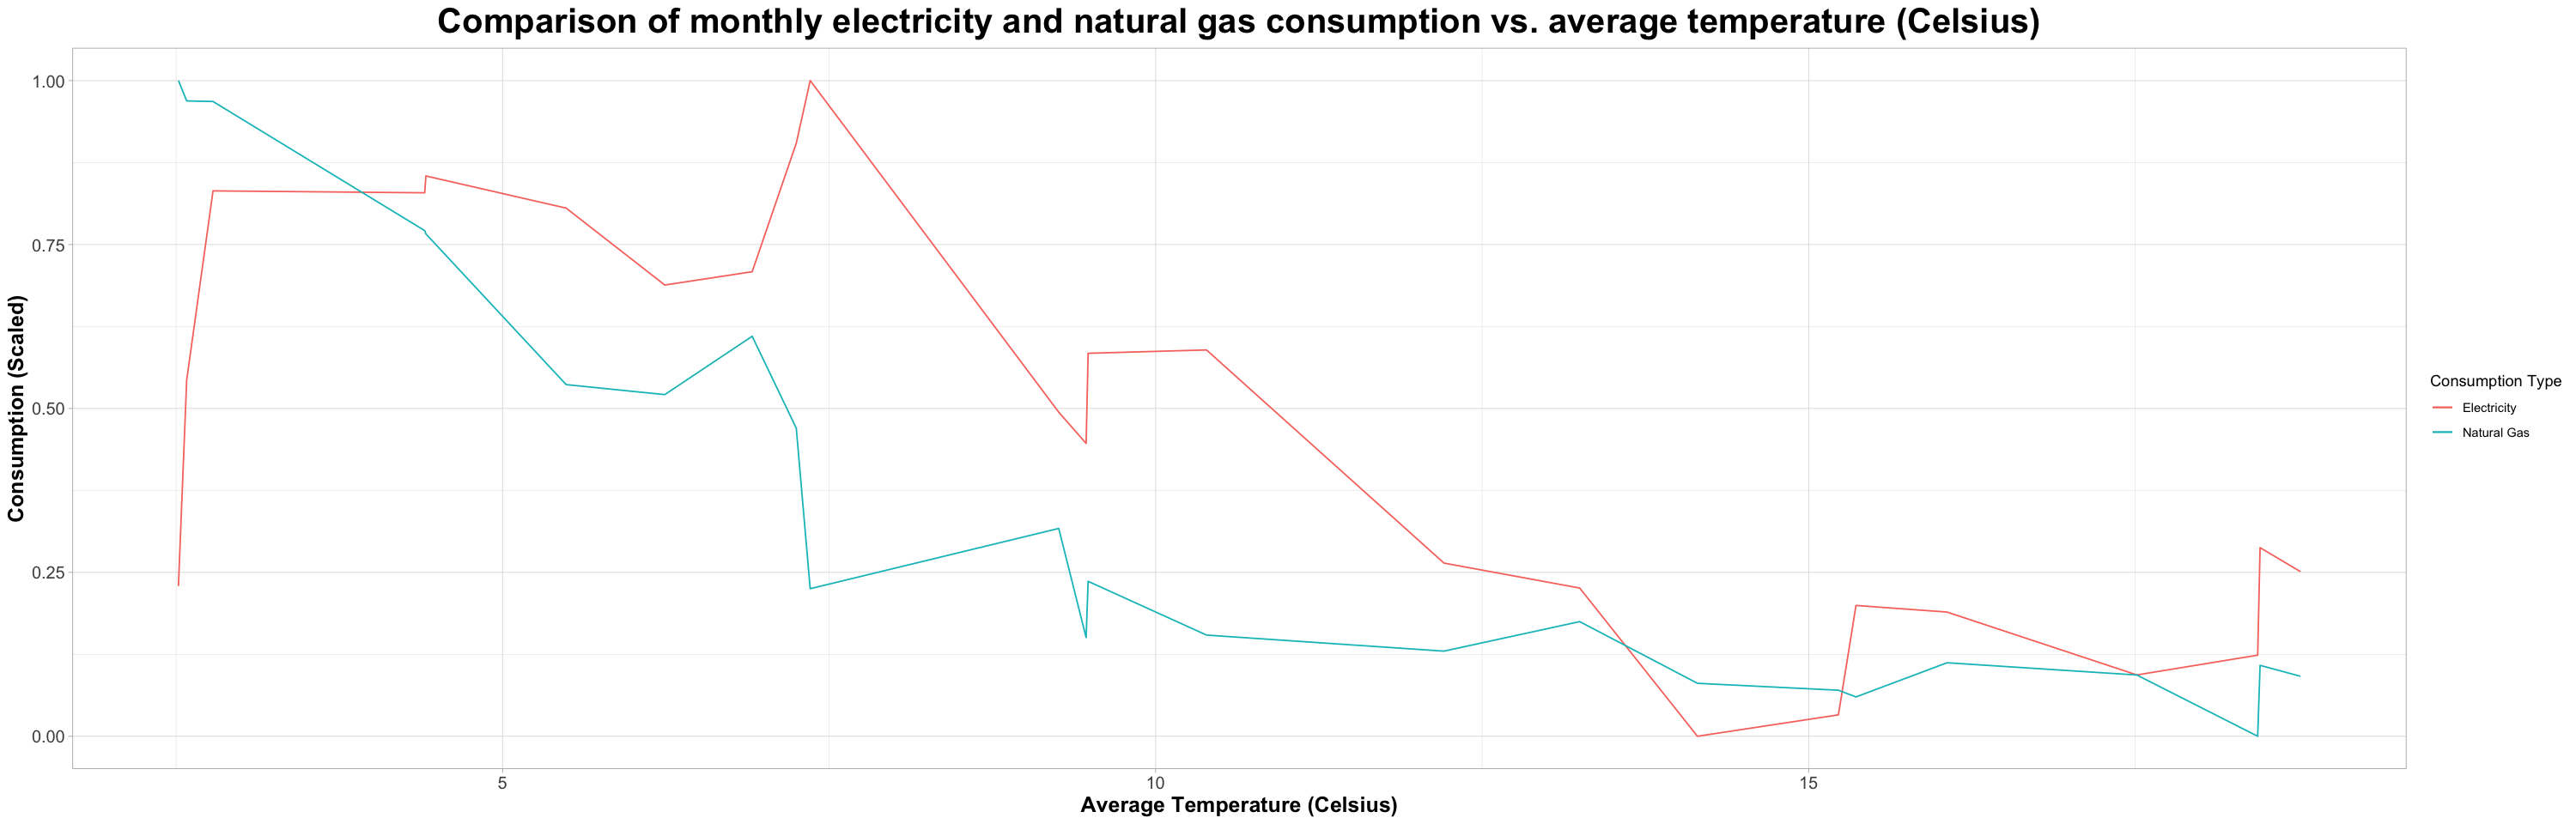

In [9]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ElecWeatherMonthDF, aes(x = avg_temp, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=NGWeatherMonthDF) +
    labs(x = "Average Temperature (Celsius)", y = "Consumption (Scaled)") +
    ggtitle("Comparison of monthly electricity and natural gas consumption vs. average temperature (Celsius)") +
    base_theme_month

## 2. Calculate correlations between the three services

##### Read CSV files

In [10]:
# Read hourly, daily and monthly electricity consumption data in csv files
ConsElecHourDF  <- read_csv(here::here("Data/Gold/Electricity", "gold_hourly_electricity.csv"),     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Electricity")
ConsElecDayDF   <- read_csv(here::here("Data/Gold/Electricity", "gold_daily_electricity.csv"),      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Electricity")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsElecMonthDF <- read_csv(here::here("Data/Gold/Electricity", "gold_monthly_electricity.csv"),    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Electricity"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

# Read hourly, daily and monthly natural_gas consumption data in csv files
ConsNGHourDF  <- read_csv(here::here("Data/Gold/NaturalGas", "gold_hourly_natural_gas.csv"),     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Natural Gas")
ConsNGDayDF   <- read_csv(here::here("Data/Gold/NaturalGas", "gold_daily_natural_gas.csv"),      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Natural Gas")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsNGMonthDF <- read_csv(here::here("Data/Gold/NaturalGas", "gold_monthly_natural_gas.csv"),    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Natural Gas"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

# Read hourly, daily and monthly water consumption data in csv files
ConsWaterHourDF  <- read_csv(here::here("Data/Gold/Water", "gold_hourly_water.csv"),     show_col_types = FALSE) %>% mutate(`Consumption Type` = "Water")
ConsWaterDayDF   <- read_csv(here::here("Data/Gold/Water", "gold_daily_water.csv"),      show_col_types = FALSE) %>% mutate(`Consumption Type` = "Water")
# Remove last month since it's not a  complete month. This would impact the mean and min max values
ConsWaterMonthDF <- read_csv(here::here("Data/Gold/Water", "gold_monthly_water.csv"),    show_col_types = FALSE) %>%
    mutate(
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-")),
        `Consumption Type` = "Water"
    ) %>% 
    filter(year_month != "2014-04") %>%
    select(-month_str)

##### Calculate correlations

In [11]:
# HOUR
electricity_natural_gas_hour_cor    <- cor(ConsElecHourDF$consumption, ConsNGHourDF$consumption)
electricity_water_hour_cor          <- cor(ConsElecHourDF$consumption, ConsWaterHourDF$consumption)
natural_gas_water_hour_cor          <- cor(ConsNGHourDF$consumption, ConsWaterHourDF$consumption)
# DAY
electricity_natural_gas_day_cor     <- cor(ConsElecDayDF$consumption, ConsNGDayDF$consumption)
electricity_water_day_cor           <- cor(ConsElecDayDF$consumption, ConsWaterDayDF$consumption)
natural_gas_water_day_cor           <- cor(ConsNGDayDF$consumption, ConsWaterDayDF$consumption)
# MONTH
electricity_natural_gas_month_cor   <- cor(ConsElecMonthDF$consumption, ConsNGMonthDF$consumption)
electricity_water_month_cor         <- cor(ConsElecMonthDF$consumption, ConsWaterMonthDF$consumption)
natural_gas_water_month_cor         <- cor(ConsNGMonthDF$consumption, ConsWaterMonthDF$consumption)

##### Display correlation results

In [12]:
# define columns one by one
time_frame      <- c(rep("hourly", 3), rep("daily", 3), rep("monthly", 3))
first_variable  <- c(rep(c("Electricity", "Electricity", "Natural Gas"), 3))
second_variable <- c(rep(c("Natural Gas", "Water", "Water"), 3))
correlation     <- c(electricity_natural_gas_hour_cor, electricity_water_hour_cor, natural_gas_water_hour_cor, electricity_natural_gas_day_cor, electricity_water_day_cor, natural_gas_water_day_cor, electricity_natural_gas_month_cor, electricity_water_month_cor, natural_gas_water_month_cor)
# Create Data Frame from columns above
AllServicesCorrDF <- data.frame(time_frame, first_variable, second_variable, correlation)
# Pivot data in order to make it more visually insighful
AllServicesCorrPivotDF <- AllServicesCorrDF %>%
    pivot_wider(names_from = time_frame, values_from = correlation)
# Display data
head(AllServicesCorrPivotDF, 3)

first_variable,second_variable,hourly,daily,monthly
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Electricity,Natural Gas,0.2408872,0.2232293,0.5752601
Electricity,Water,0.3734144,0.3931243,0.3130587
Natural Gas,Water,0.6305830,0.2191483,0.1796697


##### Filter for relationships that have a correlation (with 'consumption' variable) higher or equal to 50%

In [13]:
AllServicesCorrPivotDF %>% 
    filter((abs(hourly) >= 0.5) | (abs(daily) >= 0.5) | (abs(monthly) >= 0.5))

first_variable,second_variable,hourly,daily,monthly
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Electricity,Natural Gas,0.2408872,0.2232293,0.5752601
Natural Gas,Water,0.6305830,0.2191483,0.1796697


##### Vizualisation of monthly electricity and natural gas consumption (scaled)

In [14]:
# Define plot title
base_title_month        <- ggtitle("Comparison of monthly electricity and natural gas consumption")
# Define plot theme
base_theme_month        <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

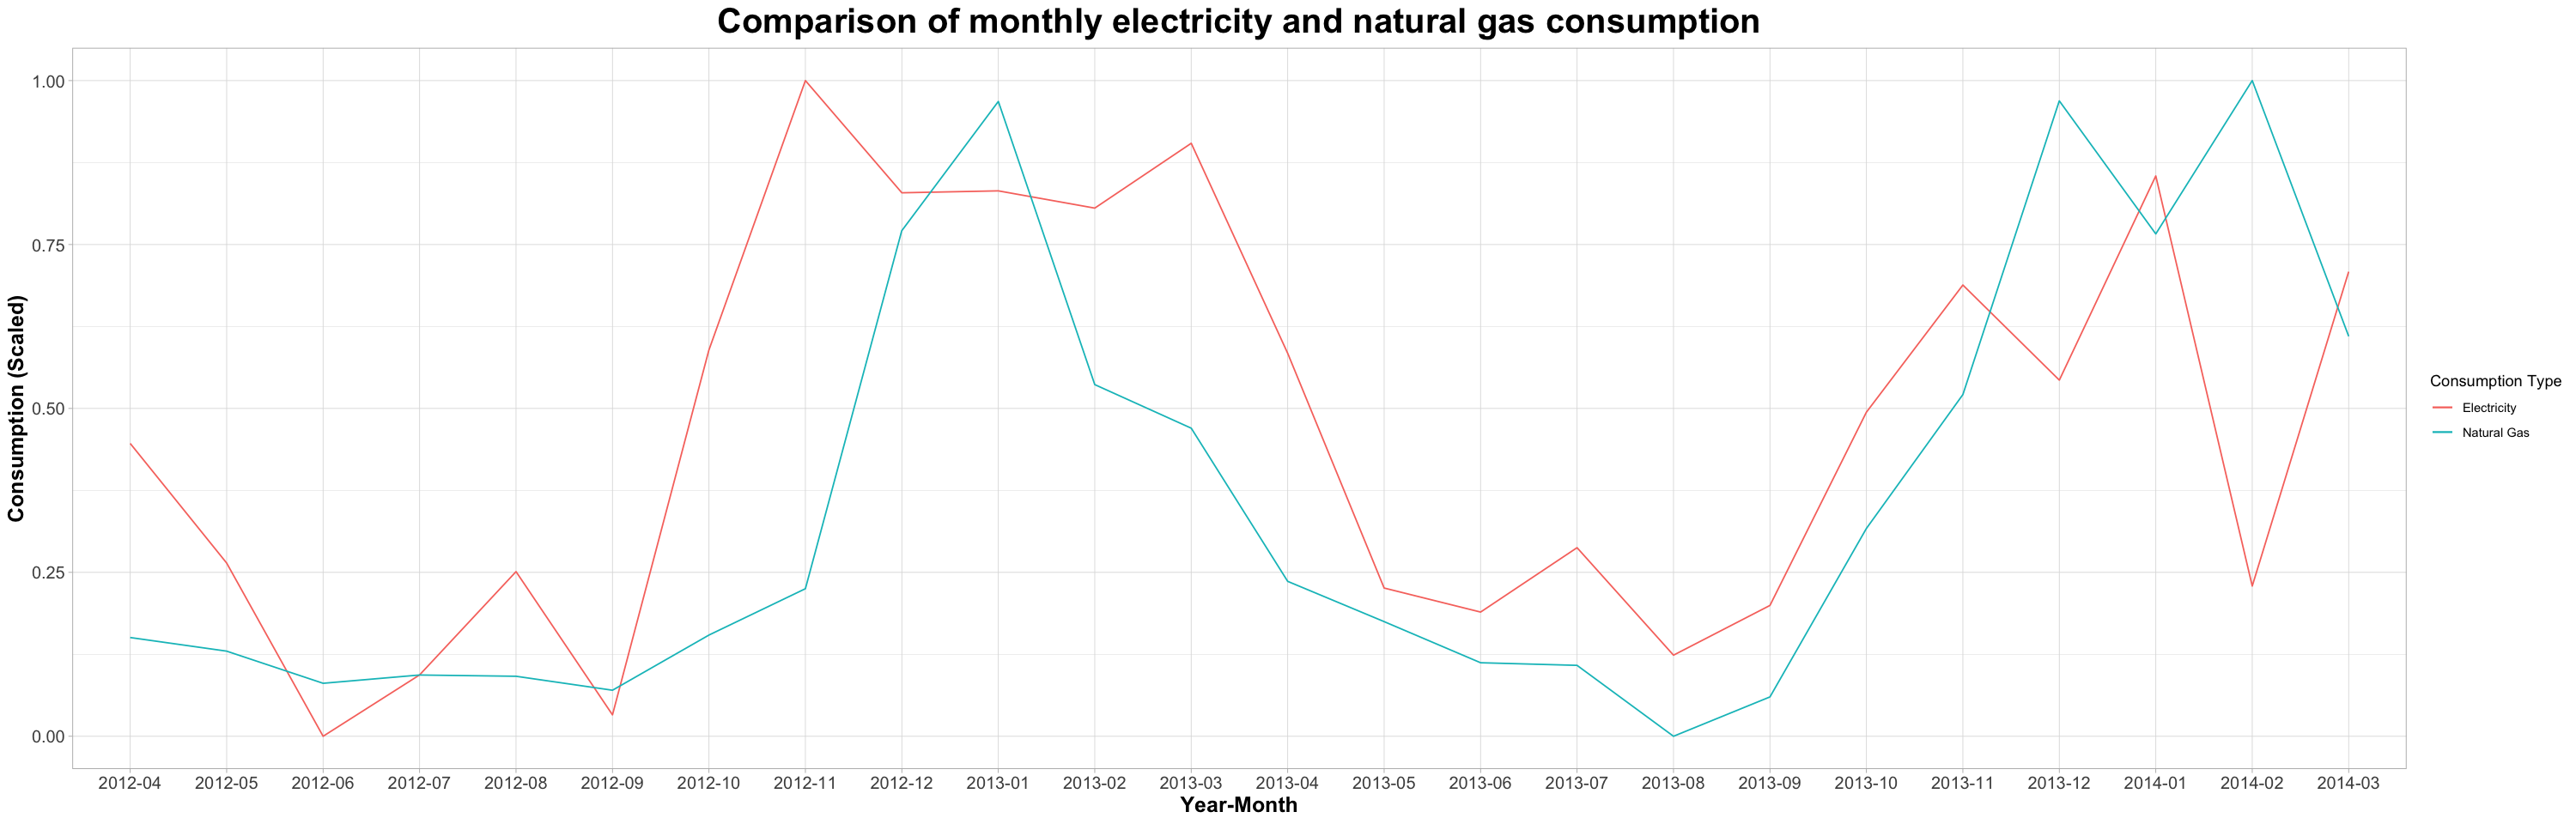

In [15]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ConsElecMonthDF, aes(x = year_month, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=ConsNGMonthDF) +
    labs(x = "Year-Month", y = "Consumption (Scaled)") +
    base_title_month +
    base_theme_month

##### Vizualisation of correlation between electricity and natural gas consumption (scaled)

In [16]:
CombinedConsMonthDF <- ConsElecMonthDF %>% 
    left_join(ConsNGMonthDF, by = c("year", "month"), suffix = c("_elec", "_ng")) %>%
    select(consumption_elec, consumption_ng)

`geom_smooth()` using formula = 'y ~ x'


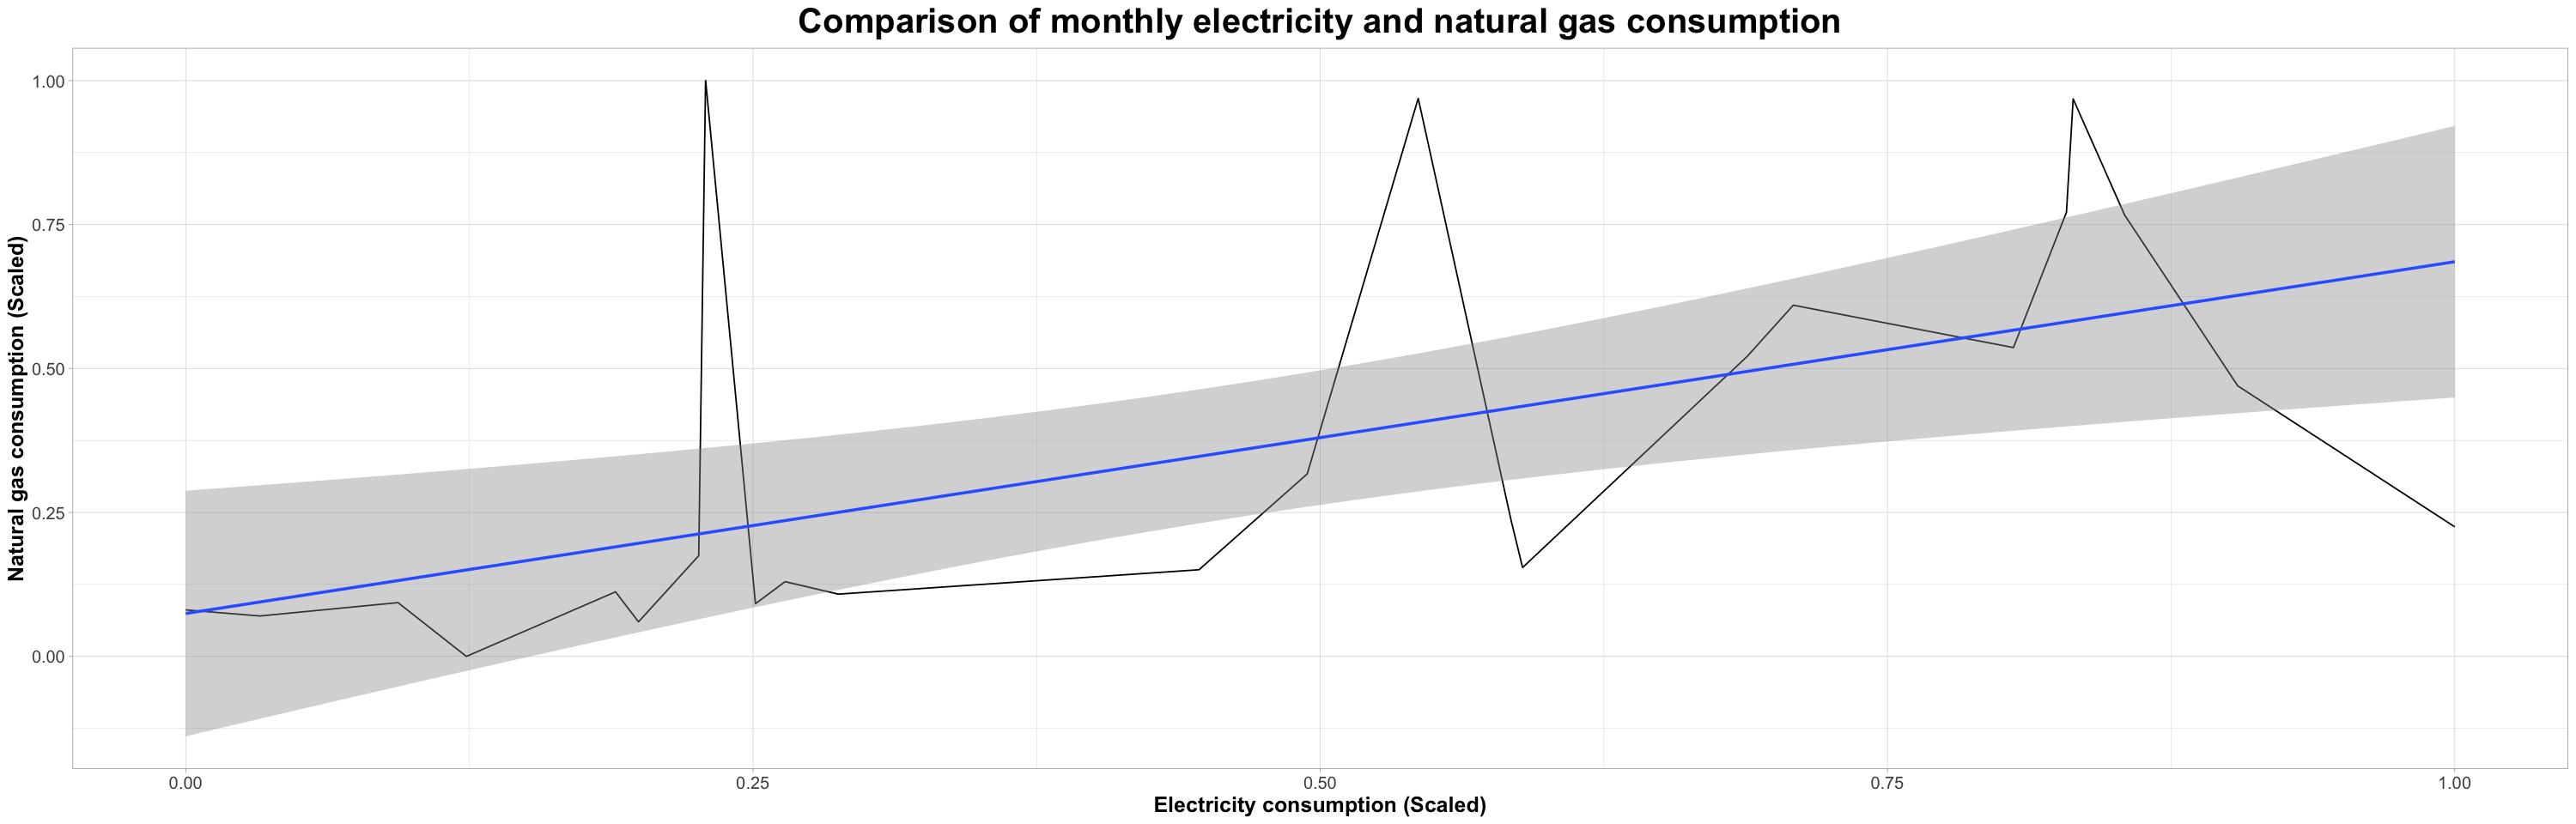

In [17]:
ggplot(CombinedConsMonthDF, aes(x = rescale(consumption_elec), y = rescale(consumption_ng))) +
    geom_line() +
    geom_smooth(method = "lm") +
    labs(x = "Electricity consumption (Scaled)", y = "Natural gas consumption (Scaled)") +
    base_title_month +
    base_theme_month

##### Vizualisation of hourly water and natural gas consumption (scaled)

In [18]:
# Aggregation by hour, retrieve mean
wHourSummarizedDF <- ConsWaterHourDF %>%
    group_by(hour, `Consumption Type`) %>%
    summarise(consumption = mean(consumption))

ngHourSummarizedDF <- ConsNGHourDF %>%
    group_by(hour, `Consumption Type`) %>%
    summarise(consumption = mean(consumption))

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


In [19]:
# Define plot title
base_title_month        <- ggtitle("Comparison of hourly water and natural gas consumption")
# Define plot theme
base_theme_month        <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

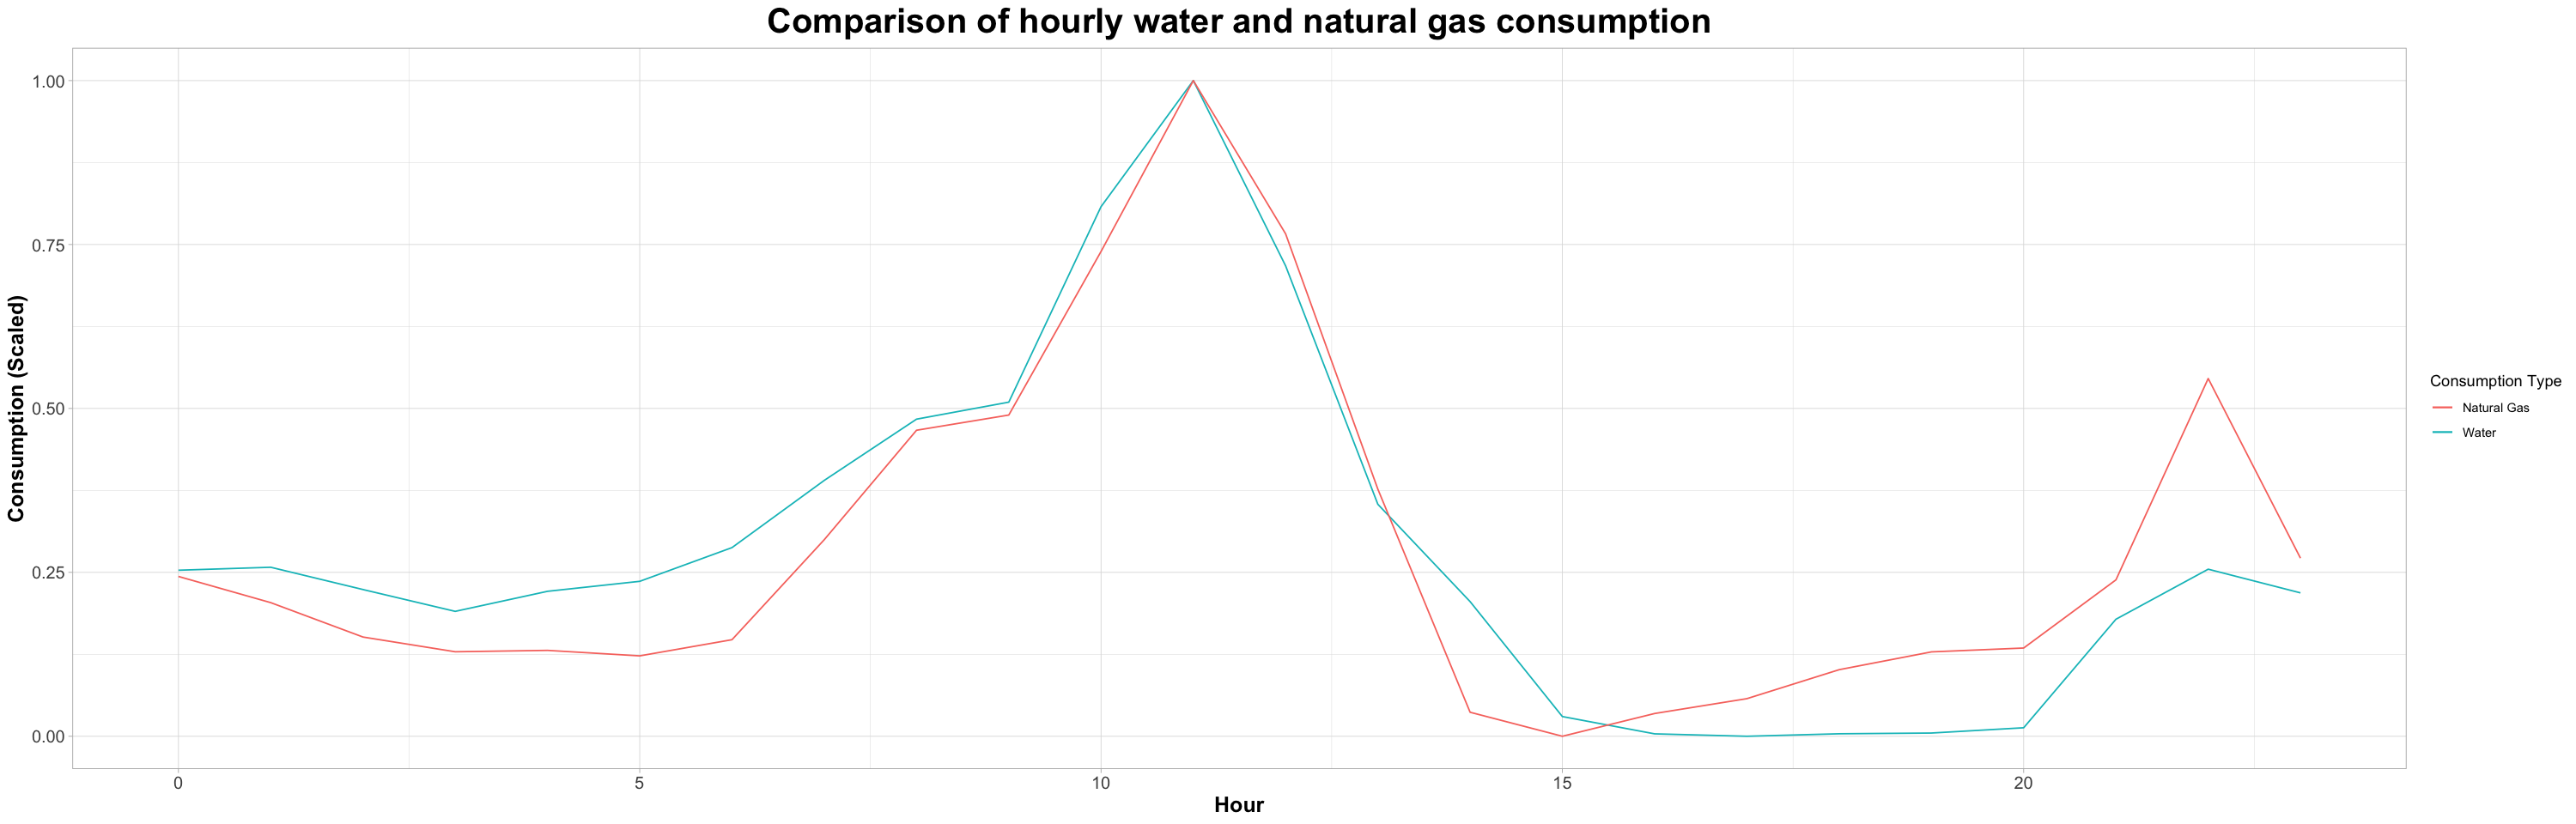

In [20]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(wHourSummarizedDF, aes(x = hour, y = rescale(consumption), group = 1, color = `Consumption Type`)) +
    geom_line() +
    geom_line(data=ngHourSummarizedDF) +
    labs(x = "Hour", y = "Consumption (Scaled)") +
    base_title_month +
    base_theme_month

## 3. Define machine learning algorithms and their attributes/parameters

### a) Attributes/parameters definition

#### Electricity consumption: Independant variables that have a significant influence

In [44]:
# Retrieve variables that have a correlation above 50% with electricity consumption
GlobalCorrDF %>% 
    filter((abs(hourly) >= 0.5) | (abs(daily) >= 0.5) | (abs(monthly) >= 0.5)) %>%
    filter(consumption_type == "Electricity")

variable_one,variable_two,hourly,daily,monthly,consumption_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Consumption,Average Dew Point,-0.117,-0.328,-0.649,Electricity
Consumption,Average Relative Humidity (%),0.117,0.309,0.626,Electricity
Consumption,Average Temperature,-0.162,-0.435,-0.749,Electricity
Consumption,Average Visibility,-0.114,-0.335,-0.719,Electricity
Consumption,Average Wind Direction,-0.056,-0.183,-0.506,Electricity


#### Natural gas: Independant variables that have a significant influence

In [45]:
# Retrieve variables that have a correlation above 50% with natural gas consumption
GlobalCorrDF %>% 
    filter((abs(hourly) >= 0.5) | (abs(daily) >= 0.5) | (abs(monthly) >= 0.5)) %>%
    filter(consumption_type == "Natural Gas")

variable_one,variable_two,hourly,daily,monthly,consumption_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Consumption,Average Dew Point,-0.354,-0.762,-0.855,Natural Gas
Consumption,Average Relative Humidity (%),0.081,0.230,0.535,Natural Gas
Consumption,Average Temperature,-0.361,-0.807,-0.891,Natural Gas
Consumption,Average Visibility,-0.110,-0.271,-0.697,Natural Gas
Consumption,Average Wind Direction,-0.050,-0.206,-0.580,Natural Gas


#### Water consumption: Independant variables that have a significant influence

In [46]:
# Retrieve variables that have a correlation above 50% with water consumption
GlobalCorrDF %>% 
    filter((abs(hourly) >= 0.5) | (abs(daily) >= 0.5) | (abs(monthly) >= 0.5)) %>%
    filter(consumption_type == "Water")

variable_one,variable_two,hourly,daily,monthly,consumption_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
